# SENG 352 - 2023/2024 SPRING SEMESTER FINAL EXAM

CEYDA GİREÇ-202028028

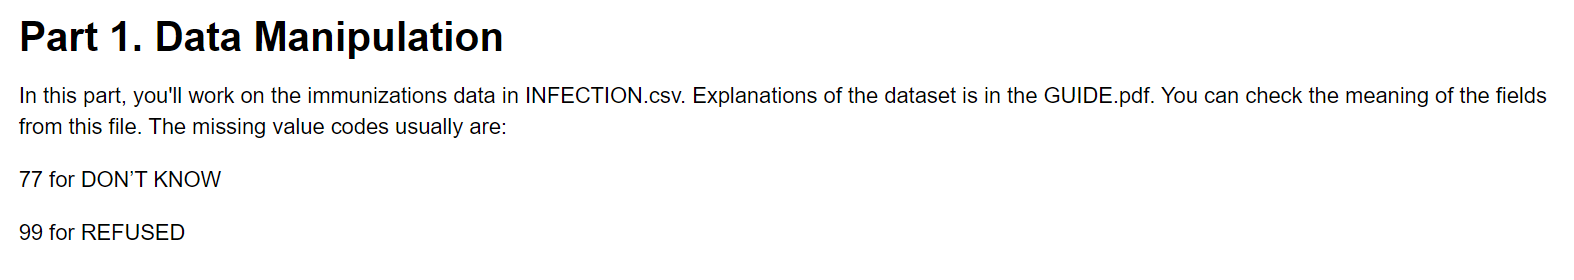

**QUESTION1(15 points):**

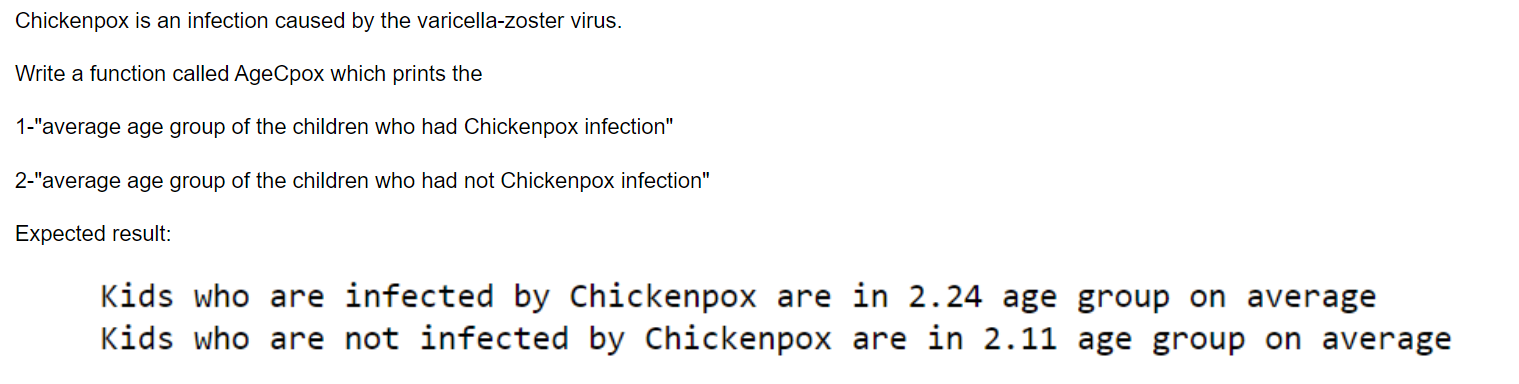

In [38]:
#Solution1 will be written in this cell

import pandas as pd

data = pd.read_csv('INFECTION.csv')

data['AGEGRP'] = pd.to_numeric(data['AGEGRP'], errors='coerce')
data['HAD_CPOX'] = pd.to_numeric(data['HAD_CPOX'], errors='coerce')

def AgeCpox(data):
    had_cpox = data[(data['HAD_CPOX'] == 1) & (data['AGEGRP'].notna())]
    no_cpox = data[(data['HAD_CPOX'] == 2) & (data['AGEGRP'].notna())]

    avg_age_had_cpox = had_cpox['AGEGRP'].mean()
    avg_age_no_cpox = no_cpox['AGEGRP'].mean()
    
    print(f"Kids who are infected by Chickenpox are in {avg_age_had_cpox:.2f} age group on average")
    print(f"Kids who are not infected by Chickenpox are in {avg_age_no_cpox:.2f} age group on average")

AgeCpox(data)


Kids who are infected by Chickenpox are in 2.24 age group on average
Kids who are not infected by Chickenpox are in 2.11 age group on average


**QUESTION 2(15 points):**
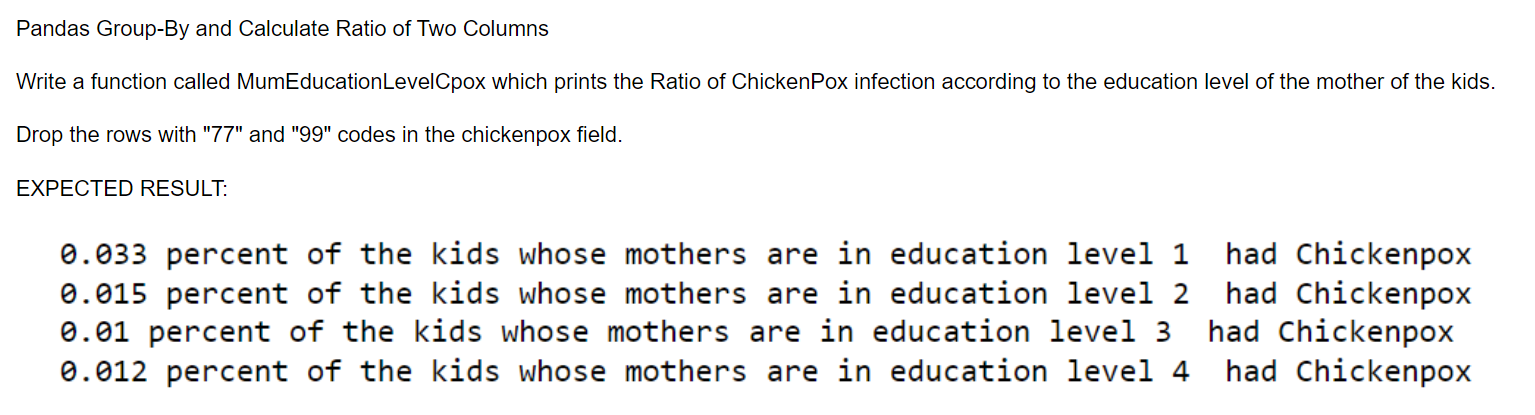

In [39]:
#Solution2 will be written in this cell

def MumEducationLevelCpox(file_path):
    
    data = pd.read_csv(file_path)
    
    data = data[~data['HAD_CPOX'].isin([77, 99])]

    grouped = data.groupby('EDUC1')

    result = {}
    
    for name, group in grouped:
        total = len(group)
        had_cpox = len(group[group['HAD_CPOX'] == 1])
        ratio = had_cpox / total if total > 0 else 0
        result[name] = ratio
   
    for edu_level, ratio in result.items():
        percentage = ratio
        print(f"{percentage:.3f} percent of the kids whose mothers are in education level {edu_level} had Chickenpox")

MumEducationLevelCpox('INFECTION.csv')


0.033 percent of the kids whose mothers are in education level 1 had Chickenpox
0.015 percent of the kids whose mothers are in education level 2 had Chickenpox
0.010 percent of the kids whose mothers are in education level 3 had Chickenpox
0.012 percent of the kids whose mothers are in education level 4 had Chickenpox


**QUESTION 3(15 points):**

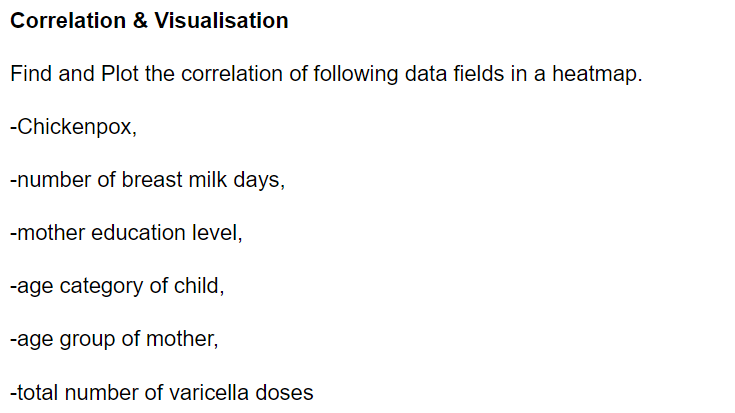


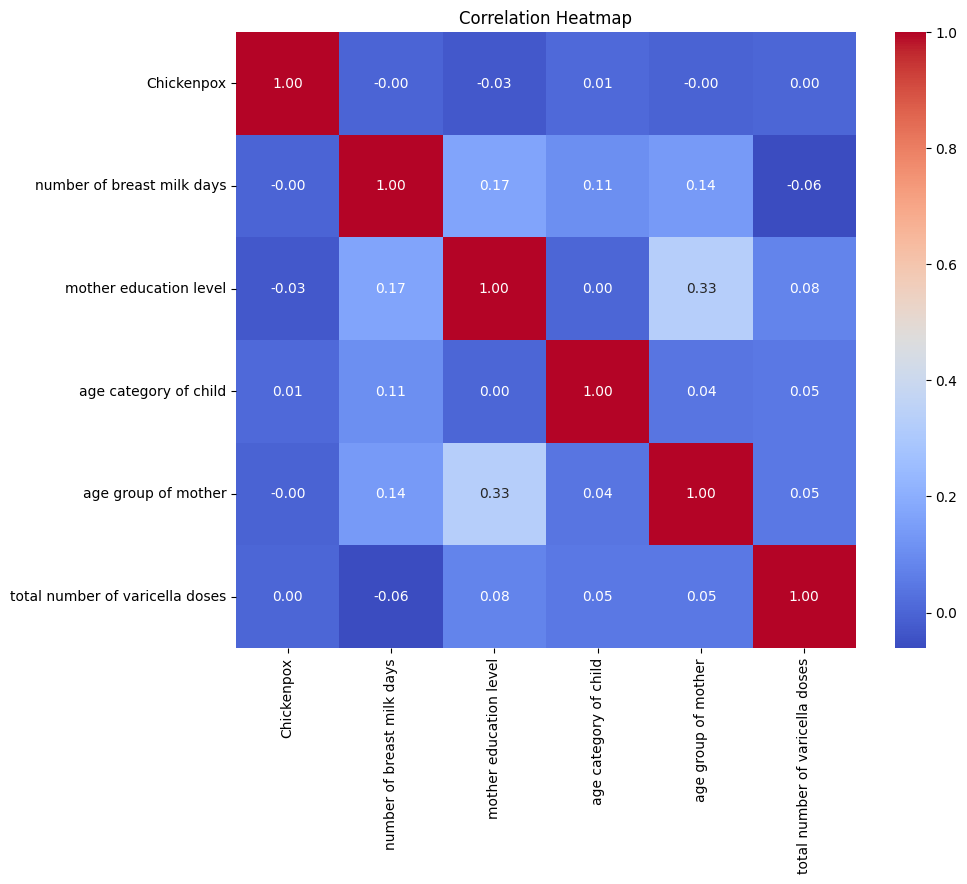

In [40]:
#Solution3 will be written in this cell

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('INFECTION.csv')  
selected_fields = ['HAD_CPOX', 'BF_ENDR06', 'EDUC1', 'AGEGRP', 'M_AGEGRP2', 'P_NUMVRC']
selected_data = data[selected_fields]

selected_data.columns = ['Chickenpox', 'number of breast milk days', 'mother education level', 
                         'age category of child', 'age group of mother', 'total number of varicella doses']

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


**QUESTION 4(15 points):**
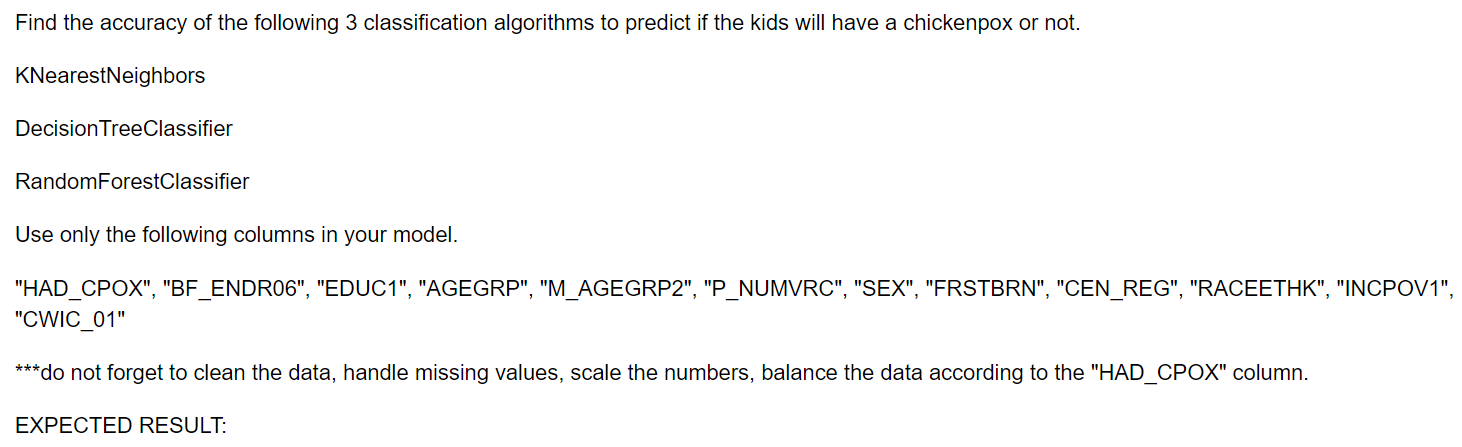
Report results should be created in a loop. 
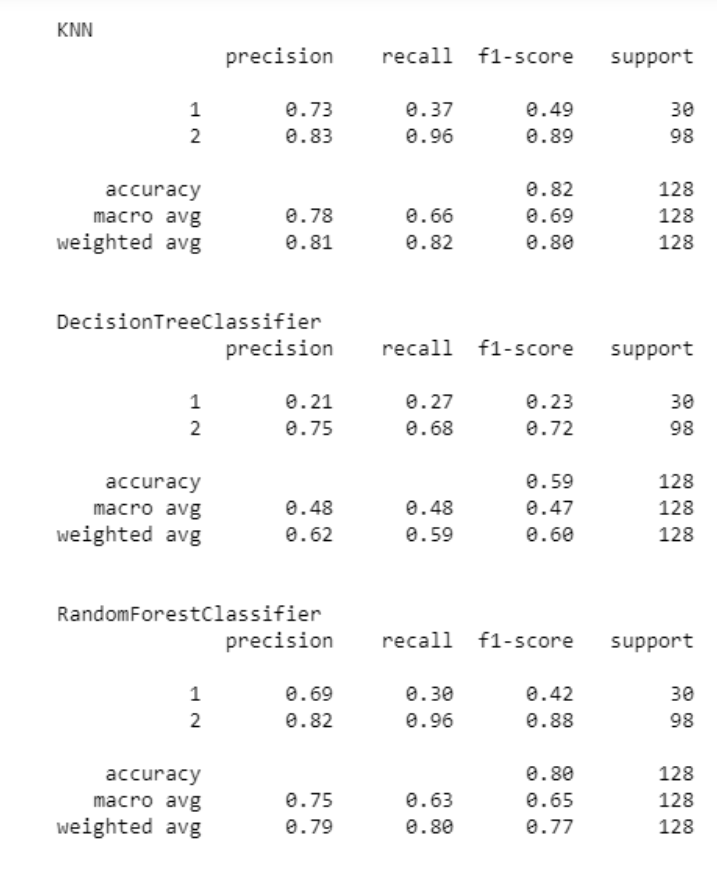



In [41]:
#Solution4 will be written in this cell

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

file_path = r'INFECTION.csv'
data = pd.read_csv(file_path)

columns = ["HAD_CPOX", "BF_ENDR06", "EDUC1", "AGEGRP", "M_AGEGRP2", "P_NUMVRC", "SEX", "FRSTBRN", "CEN_REG", "RACEETHK", "INCPOV1", "CWIC_01"]
data = data[columns]

data = data[~data['HAD_CPOX'].isin([77, 99])]

data = data.dropna()

X = data.drop('HAD_CPOX', axis=1)
y = data['HAD_CPOX']

df_majority = data[data.HAD_CPOX == 2]
df_minority = data[data.HAD_CPOX == 1]

df_majority_downsampled = df_majority.sample(n=98, random_state=42)
df_minority_downsampled = df_minority.sample(n=30, random_state=42)

data_downsampled = pd.concat([df_majority_downsampled, df_minority_downsampled])

X_downsampled = data_downsampled.drop('HAD_CPOX', axis=1)
y_downsampled = data_downsampled['HAD_CPOX']

X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42, stratify=y_downsampled)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN")
print(classification_report(y_test, y_pred_knn))

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DecisionTreeClassifier")
print(classification_report(y_test, y_pred_dt))

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RandomForestClassifier")
print(classification_report(y_test, y_pred_rf))

KNN
              precision    recall  f1-score   support

           1       0.67      0.33      0.44         6
           2       0.83      0.95      0.88        20

    accuracy                           0.81        26
   macro avg       0.75      0.64      0.66        26
weighted avg       0.79      0.81      0.78        26

DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.43      0.50      0.46         6
           2       0.84      0.80      0.82        20

    accuracy                           0.73        26
   macro avg       0.64      0.65      0.64        26
weighted avg       0.75      0.73      0.74        26

RandomForestClassifier
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           2       0.83      1.00      0.91        20

    accuracy                           0.85        26
   macro avg       0.92      0.67      0.70        26
weighted avg       0.87 

# PART2: REGULAR EXPRESSIONS
**QUESTION 5(15 points):**

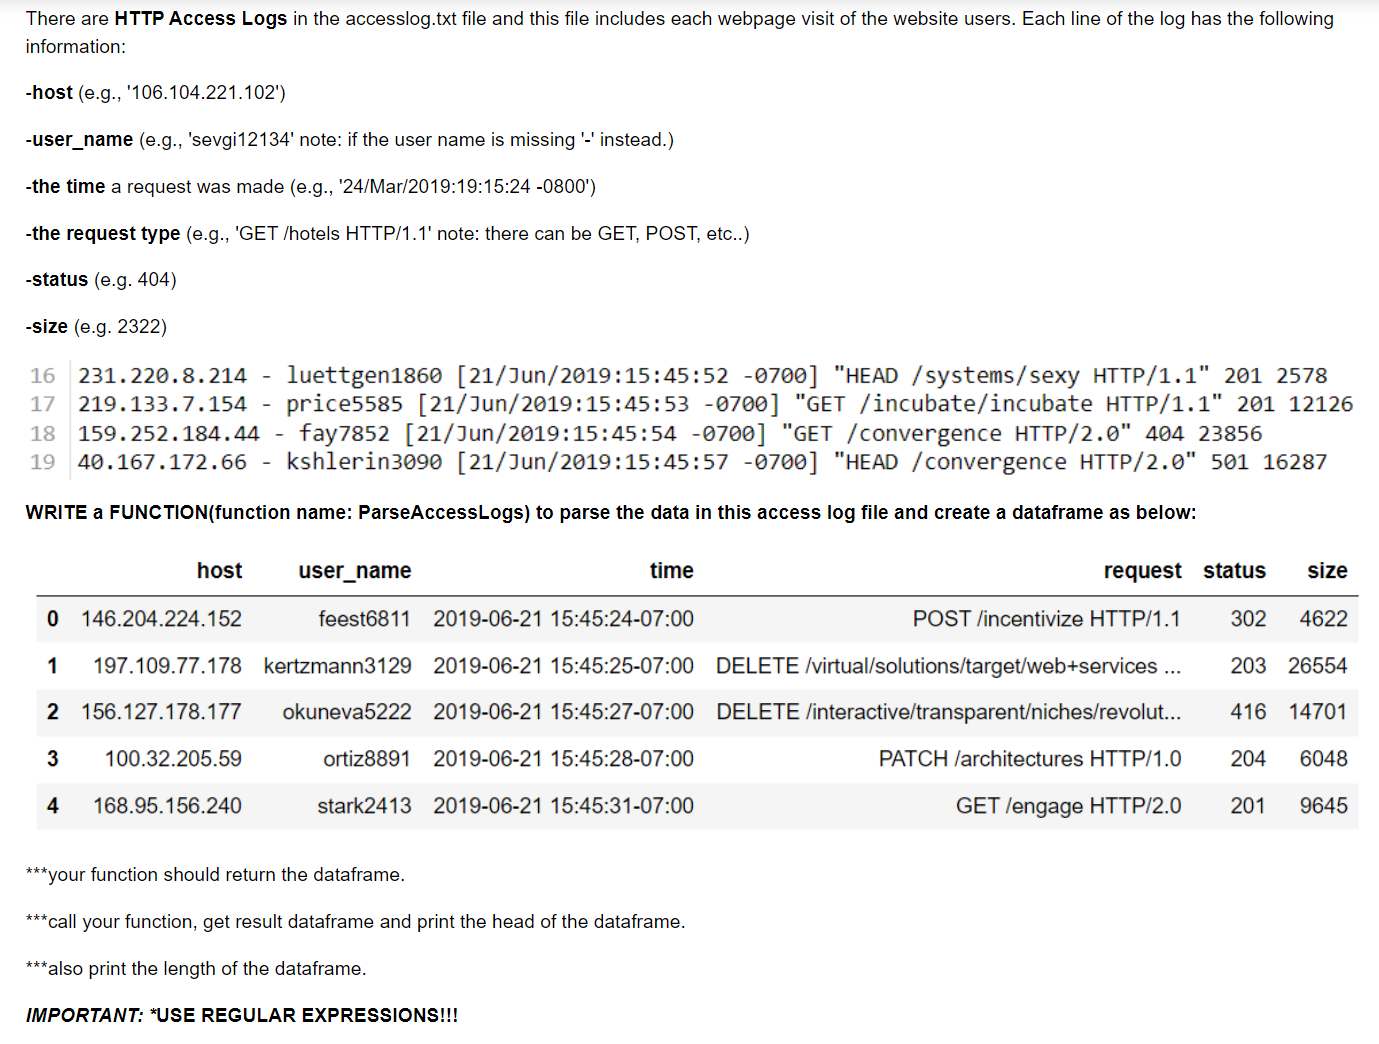

In [42]:
#Solution5 will be written in this cell

import re
import pandas as pd

def ParseAccessLogs(log_file_path):
    pattern = re.compile(
        r'(?P<host>\d+\.\d+\.\d+\.\d+)\s+-\s+(?P<user_name>\S+)\s+\[(?P<time>.+?)\]\s+"(?P<request>.+?)"\s+(?P<status>\d+)\s+(?P<size>\d+)'
    )
    
    with open(log_file_path, 'r') as file:
        lines = file.readlines()
    
    data = []
    
    for line in lines:
        match = pattern.match(line)
        if match:
            data.append(match.groupdict())
    
    df = pd.DataFrame(data)
    
    return df

log_file_path = 'accesslog.txt'

df = ParseAccessLogs(log_file_path)

print(df.head())

print(f'Length of DataFrame: {len(df)}')



              host      user_name                        time  \
0  146.204.224.152      feest6811  21/Jun/2019:15:45:24 -0700   
1   197.109.77.178  kertzmann3129  21/Jun/2019:15:45:25 -0700   
2  156.127.178.177    okuneva5222  21/Jun/2019:15:45:27 -0700   
3    100.32.205.59      ortiz8891  21/Jun/2019:15:45:28 -0700   
4   168.95.156.240      stark2413  21/Jun/2019:15:45:31 -0700   

                                             request status   size  
0                         POST /incentivize HTTP/1.1    302   4622  
1  DELETE /virtual/solutions/target/web+services ...    203  26554  
2  DELETE /interactive/transparent/niches/revolut...    416  14701  
3                      PATCH /architectures HTTP/1.0    204   6048  
4                               GET /engage HTTP/2.0    201   9645  
Length of DataFrame: 979


**QUESTION 6(15 points):**

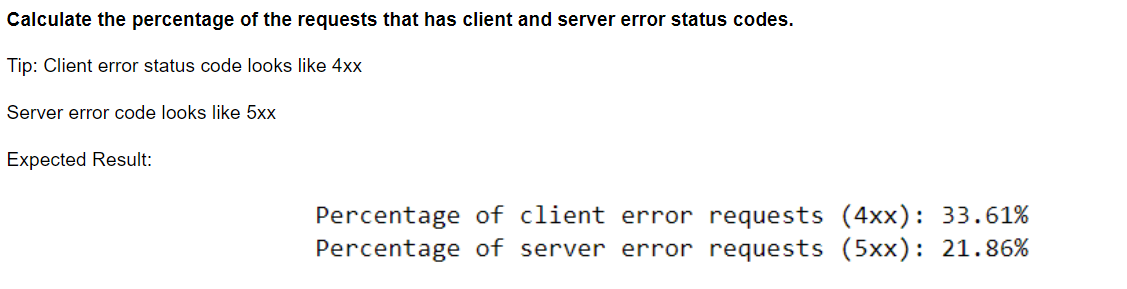

In [44]:
#Solution6 will be written in this cell

total_requests = len(df)

client_error_requests = len(df[df['status'].str.startswith('4')])

server_error_requests = len(df[df['status'].str.startswith('5')])

client_error_percentage = (client_error_requests / total_requests) * 100
server_error_percentage = (server_error_requests / total_requests) * 100

print(f"Percentage of client error requests (4xx): {client_error_percentage:.2f}%")
print(f"Percentage of server error requests (5xx): {server_error_percentage:.2f}%")


Percentage of client error requests (4xx): 33.61%
Percentage of server error requests (5xx): 21.86%


**QUESTION7(10 points):**
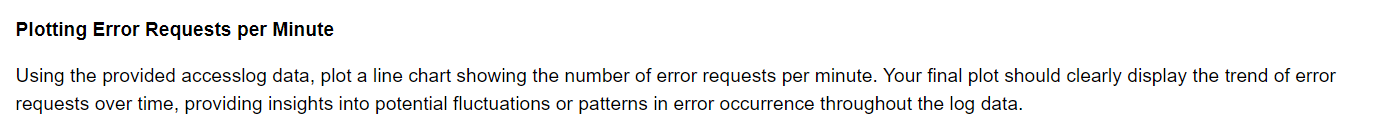

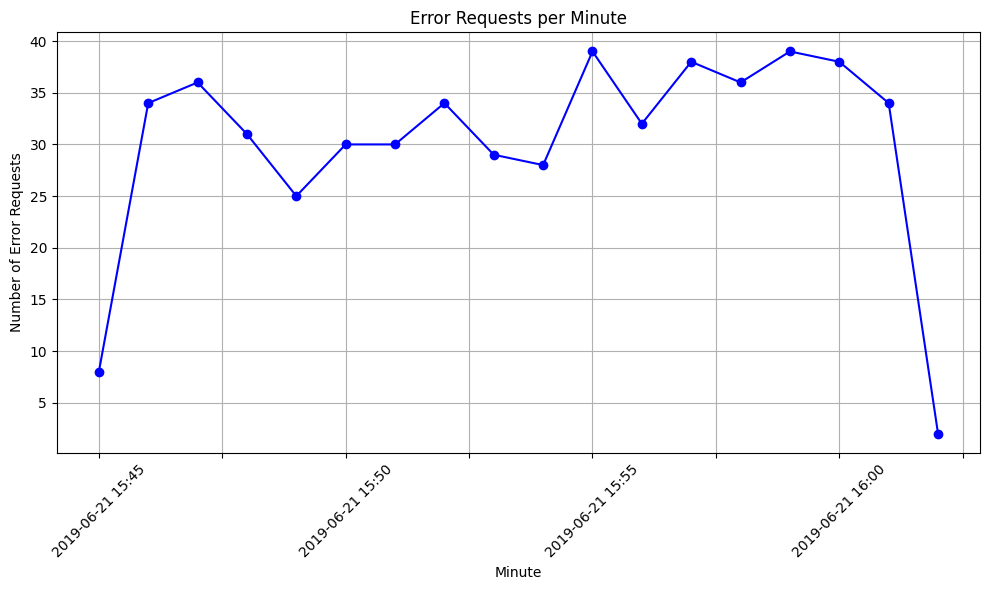

In [74]:
#Solution7 will be written in this cell

import pandas as pd
import re
import matplotlib.pyplot as plt

def ParseAccessLogs(log_file_path):
    pattern = re.compile(
        r'(?P<host>\d+\.\d+\.\d+\.\d+)\s+-\s+(?P<user_name>\S+)\s+\[(?P<time>.+?)\]\s+"(?P<request>.+?)"\s+(?P<status>\d+)\s+(?P<size>\d+)'
    )
    
    with open(log_file_path, 'r') as file:
        lines = file.readlines()
    
    data = []
    
    for line in lines:
        match = pattern.match(line)
        if match:
            data.append(match.groupdict())
    
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')  
    df['minute'] = df['time'].dt.strftime('%Y-%m-%d %H:%M')
    
    return df

log_file_path = 'accesslog.txt'

df = ParseAccessLogs(log_file_path)

error_requests_df = df[df['status'].str.startswith(('4', '5'))]

error_requests_per_minute = error_requests_df.groupby('minute').size()

plt.figure(figsize=(10, 6))
error_requests_per_minute.plot(kind='line', marker='o', color='b')
plt.title('Error Requests per Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Error Requests')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()